In [26]:
with open('../configuration files/../configuration files/data.cfg', 'r') as file:
    lines = file.readlines()

data = []
sections = {}

prof_ids = set()
course_ids = set()
room_names = set()
group_ids = set()
current_section = None 

for line in lines:
    line = line.strip()
    if line == '#prof':
        current_section = 'prof'
    elif line == '#room':
        current_section = 'room'
    elif line == '#course':
        current_section = 'course'
    elif line == '#group':
        current_section = 'group'
        
    elif line == '#end':
        data.append(sections)
        sections = {}
        current_section = None
    elif current_section and '=' in line:
        key , value = line.split(' = ')
        sections[key] = value       
        if key == 'id':
            if current_section == 'prof':
                prof_ids.add(value)
            elif current_section == 'course':
                course_ids.add(value)
            elif current_section == 'group':
                group_ids.add(value)
        elif key == 'name':
            if current_section == 'room':
                room_names.add(value)

print(f'Unique #prof: {len(prof_ids)}')
print(f'Unique #course: {len(course_ids)}')
print(f'Unique #room: {len(room_names)}')
print(f'Unique #group: {len(group_ids)}')
print(f'Total sections: {len(data)}')
print(data)

Unique #prof: 12
Unique #course: 12
Unique #room: 4
Unique #group: 4
Total sections: 53
[{'id': '1', 'name': 'Nancy Harris'}, {'id': '2', 'name': 'Valerie Salitan'}, {'id': '3', 'name': 'Katya Henry'}, {'id': '4', 'name': 'Rebecca Archer'}, {'id': '5', 'name': 'Trevor Buckley'}, {'id': '6', 'name': 'Jennifer Aaron'}, {'id': '7', 'name': 'Gillian Auger'}, {'id': '8', 'name': 'Scott Cogan'}, {'id': '9', 'name': 'Rena Gregory'}, {'id': '10', 'name': 'Katelyn Talty'}, {'id': '11', 'name': 'Nathan Nichols'}, {'id': '12', 'name': 'Karter Caldwell'}, {'id': '1', 'name': 'Calculus'}, {'id': '2', 'name': 'Physics'}, {'id': '3', 'name': 'Advanced Algorithms'}, {'id': '4', 'name': 'Database Management'}, {'id': '5', 'name': 'Discrete Mathematics'}, {'id': '6', 'name': 'Software Design and Analysis'}, {'id': '7', 'name': 'Computer Vision'}, {'id': '8', 'name': 'Machine Learning'}, {'id': '9', 'name': 'Visualizations'}, {'id': '10', 'name': 'Applied Chemistry'}, {'id': '11', 'name': 'Computer Theor

In [47]:
import sys 
sys.path.append('../configuration files/')

import Configuration

PATH = '../configuration files/data_old.cfg'
config = Configuration.Configuration()
config.Parsefile(PATH)


parse course
parse course
parse course
parse course
parse course
parse course
parse course
parse course
parse course
parse course
parse course
parse course
laaab:  R48 false False 0
laaab:  R53 true True 1
laaab:  R50 true True 2
laaab:  R13 true True 3


In [21]:
variables = {}  
domains = {}

for section in data:
    if section['type'] == 'prof':
        variables[section['id']] = section['name']
        domains[section['id']] = course_ids
    elif section['type'] == 'course':
        variables[section['id']] = section['name']
        domains[section['id']] = room_names
    elif section['type'] == 'group':
        variables[section['id']] = section['name']
        domains[section['id']] = course_ids

print(variables)

KeyError: 'type'

Number of Professors: 12
Number of Courses: 12
Number of Rooms: 4


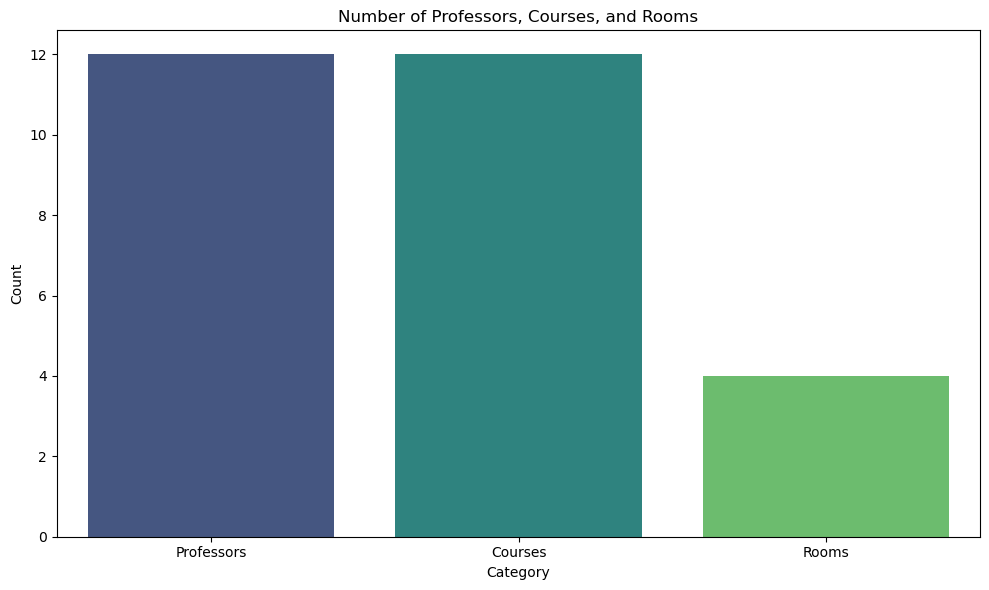

In [19]:
import configparser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load configuration
def load_config(file_path):
    config = configparser.ConfigParser()
    config.read(file_path)
    return config

# Extract data from configuration
def extract_data(config):
    professors = {k: v for k, v in config.items('Professors')}
    courses = {k: v for k, v in config.items('Courses')}
    rooms = {k: v.split(',')[0].strip() for k, v in config.items('Rooms')}
    return professors, courses, rooms

# Statistical analysis and visualization
def analyze_and_visualize(professors, courses, rooms):
    # Convert data to DataFrame for easier analysis
    df_professors = pd.DataFrame(list(professors.items()), columns=['ID', 'Name'])
    df_courses = pd.DataFrame(list(courses.items()), columns=['ID', 'Course'])
    df_rooms = pd.DataFrame(list(rooms.items()), columns=['ID', 'Room'])

    # Descriptive statistics
    num_professors = df_professors['ID'].nunique()
    num_courses = df_courses['ID'].nunique()
    num_rooms = df_rooms['ID'].nunique()

    print(f"Number of Professors: {num_professors}")
    print(f"Number of Courses: {num_courses}")
    print(f"Number of Rooms: {num_rooms}")

    # Visualization
    plt.figure(figsize=(10, 6))

    # Plot number of teachers, courses, and rooms in one figure
    sns.barplot(x=['Professors', 'Courses', 'Rooms'], y=[num_professors, num_courses, num_rooms], palette='viridis')
    plt.title('Number of Professors, Courses, and Rooms')
    plt.xlabel('Category')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Load the configuration file
config_path = '../configuration files/data.cfg'
config = load_config(config_path)

# Extract data from the configuration
professors, courses, rooms = extract_data(config)

# Perform statistical analysis and visualize the data
analyze_and_visualize(professors, courses, rooms)
